Distribution densities:
f(x) = exp(-x)
f(y) = exp(-y)

f(x, y) = f(x) * f(y)
=> Сontinuous random variable is independent

Conditional densities:
f(x|Y=y) = exp(-x)
f(y|X=x) = exp(-y)

Distribution functions:
F(x) = 1 - exp(-x)
F(y) = 1 - exp(-y)

Inverse functions:
F^-1(x) = log(-1/(y - 1))
F^-1(y) = log(-1/(x - 1))


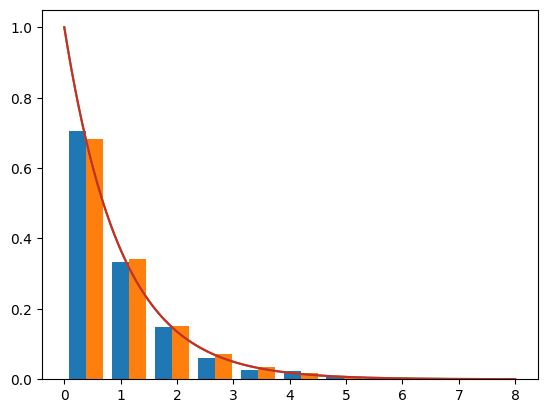

Confidence intervals:
Math expectation (X): (0.9324835008632754, 1.061312762189523)
Math expectation (Y): (0.954933851816423, 1.0748603382204112)
Dispersion (X): (0.9912863225116305, 1.1814312526466597)
Dispersion (Y): (0.8590141158846518, 1.0237870733446541)
Theoretical values:
M(x) = 1.0
M(y) = 1.0
D(x) = 1.0
D(y) = 1.0
r(x,y) = 0

Practical values:
M(x) = 0.9968981315263992
M(y) = 1.014897095018417
D(x) = 1.080082424892403
D(y) = 0.9359617178523238
r(x,y) = 0.019230215993282517


In [2]:
import sympy as sp
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import chi


n = 1000

def get_practical_math_expectation(values):
    return sum(values) / len(values)

def get_practical_dispersion(values):
    math_expression = get_practical_math_expectation(values)
    return sum((element - math_expression) ** 2 for element in values) / (len(values) - 1)

def get_math_expectation_confidence_interval(values):
    t = 1.96
    math_exp = get_practical_math_expectation(values)
    dispersion = get_practical_dispersion(values)
    delta = t * (dispersion ** 0.5) / (n ** 0.5)
    return (math_exp - delta, math_exp + delta)

def get_dispersion_confidence_interval(values, confidence_level):
    standard_deviation = np.sqrt(get_practical_dispersion(values))
    alpha1 = (1 - confidence_level) / 2
    alpha2 = (1 + confidence_level) / 2
    chi1 = chi.ppf(alpha1, n - 1)
    chi2 = chi.ppf(alpha2, n - 1)
    return ((n - 1) * (standard_deviation ** 2) / (chi2 ** 2), (n - 1) * (standard_deviation ** 2) / (chi1 ** 2))

def get_theoretical_math_expectation(f, x, left, right):
    return float(sp.integrate(x * f, (x, left, right)))

def get_theoretical_dispersion(f, x, left, right):
    return float(sp.integrate(x ** 2 * f, (x, left, right))) - get_theoretical_math_expectation(f, x, left, right) ** 2

def get_theoretical_correl(f, x, y, f_x, f_y, left, right):
    x_math_exp = get_theoretical_math_expectation(f_x, x, left, right)
    y_math_exp = get_theoretical_math_expectation(f_y, y, left, right)
    cov = sp.integrate(sp.integrate((x - x_math_exp) * (y - y_math_exp) * f, (x, left, right)), (y, left, right))
    x_dispersion = get_theoretical_dispersion(f_x, x, left, right)
    y_dispersion = get_theoretical_dispersion(f_y, y, left, right)
    return cov / np.sqrt(x_dispersion * y_dispersion)

def get_x_density(f, y, left, right):
    return sp.integrate(f, (y, left, right))

def get_x_conditional_density(f, y_density):
    return sp.simplify(f / y_density)

def get_y_density(f, x, left, right):
    return sp.integrate(f, (x, left, right))

def get_y_conditional_density(f, x_density):
    return sp.simplify(f / x_density)

def inverse_function(f, x, y):
    func = sp.Eq(y, f)
    f_inv = sp.solve(func, x)
    return f_inv[0]

def generate_values(f, x):
    return [float(f.subs(x, random.uniform(0, 1))) for _ in range(n)]

def task1():
    x, y = sp.symbols('x y')
    f = sp.simplify('exp(-x-y)')
    left, right = 0, np.inf

    x_density = get_x_density(f, y, left, right)
    y_density = get_y_density(f, x, left, right)

    print('Distribution densities:\n' \
          f'f(x) = {x_density}\n' \
          f'f(y) = {y_density}\n')

    if f == sp.simplify(x_density * y_density):
        print('f(x, y) = f(x) * f(y)\n' \
              '=> Сontinuous random variable is independent\n')
    else:
        print('f(x, y) != f(x) * f(y)\n'\
              '=> Сontinuous random variable is not independent\n')

    x_conditional_density = get_x_conditional_density(f, y_density)
    y_conditional_density = get_y_conditional_density(f, x_density)
    print('Conditional densities:\n'
          f'f(x|Y=y) = {x_conditional_density}\n' \
          f'f(y|X=x) = {y_conditional_density}\n')

    Fx = sp.integrate(x_density, (x, left, x))
    Fy = sp.integrate(y_density, (y, left, y))
    print('Distribution functions:\n' \
          f'F(x) = {Fx}\n' \
          f'F(y) = {Fy}\n')

    Fx_inv = inverse_function(Fx, x, y)
    Fy_inv = inverse_function(Fy, y, x)
    print('Inverse functions:\n' \
          f'F^-1(x) = {Fx_inv}\n' \
          f'F^-1(y) = {Fy_inv}')

    x_values = generate_values(Fx_inv, y)
    y_values = generate_values(Fy_inv, x)
    figure, ax = plt.subplots()
    ax.hist([x_values, y_values], density=True)

    f_x = sp.lambdify(x, x_density, 'numpy')
    f_y = sp.lambdify(y, y_density, 'numpy')
    temp_values = np.linspace(0, 8, n)

    ax.plot(temp_values, f_x(temp_values))
    ax.plot(temp_values, f_y(temp_values))
    plt.show()

    print('Confidence intervals:')
    print(f'Math expectation (X): {get_math_expectation_confidence_interval(x_values)}')
    print(f'Math expectation (Y): {get_math_expectation_confidence_interval(y_values)}')
    print(f'Dispersion (X): {get_dispersion_confidence_interval(x_values, 0.95)}')
    print(f'Dispersion (Y): {get_dispersion_confidence_interval(y_values, 0.95)}')

    print('Theoretical values:')
    print(f'M(x) = {get_theoretical_math_expectation(x_density, x, left, right)}')
    print(f'M(y) = {get_theoretical_math_expectation(y_density, y, left, right)}')
    print(f'D(x) = {get_theoretical_dispersion(x_density, x, left, right)}')
    print(f'D(y) = {get_theoretical_dispersion(y_density, y, left, right)}')
    print(f'r(x,y) = {get_theoretical_correl(f, x, y, x_density, y_density, left, right)}')

    print('\nPractical values:')
    print(f'M(x) = {get_practical_math_expectation(x_values)}')
    print(f'M(y) = {get_practical_math_expectation(y_values)}')
    print(f'D(x) = {get_practical_dispersion(x_values)}')
    print(f'D(y) = {get_practical_dispersion(y_values)}')
    print(f'r(x,y) = {st.pearsonr(x_values, y_values)[0]}')



task1()

Distribution densities:
P(X) = [0.25  0.25  0.375 0.125]
P(Y) = [0.24  0.285 0.475]

P(X = x_i, Y = y_j) != P(X = x_i) * P(Y = y_j)
=> Discrete random variable is independent

Conditional densities:
P(X|Y) = [[0.41666667 0.41666667 0.10416667 0.0625    ]
 [0.0877193  0.35087719 0.52631579 0.03508772]
 [0.26315789 0.10526316 0.42105263 0.21052632]]
P(Y|X) = [[0.4        0.4        0.06666667 0.12      ]
 [0.1        0.4        0.4        0.08      ]
 [0.5        0.2        0.53333333 0.8       ]]



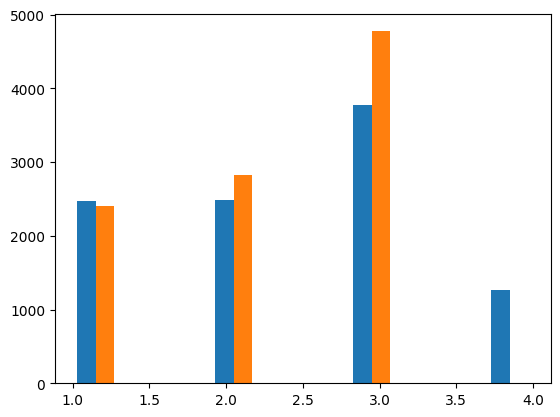

Confidence intervals:
Math expectation (X): (2.363764783051188, 2.402635216948812)
Math expectation (Y): (2.220448185313088, 2.252351814686912)
Dispersion (X): (0.9565600045042639, 1.0110909433082231)
Dispersion (Y): (0.6443971694284654, 0.681132536207426)

Theoretical values:
M(x)= 2.375
M(y)= 2.235
D(x)= 0.984375
D(y)= 0.6597749999999998
r(x,y)= 0.28772374971641934

Practical values:
M(x) =  2.3832
M(y) = 2.2364
D(x) =  0.9832560856085675
D(y) =  0.6623812781278056
r(x,y) =  0.2985476475444428


In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as st

n = 10_000

def get_x_density(matrix, X):
    return np.array([sum(matrix[:, i]) for i in range(0, len(X))])

def get_y_density(matrix, Y):
    return np.array([sum(matrix[i]) for i in range(0, len(Y))])

def check_densities(matrix, x_density, y_density):
    is_cond = False
    for i in range(0, len(x_density)):
        for j in range(0, len(y_density)):
            if matrix[j][i] != x_density[i] * y_density[j]:
                is_cond = True
    return is_cond

def get_x_conditional_density(matrix, x_density, y_density):
    cond_x_density = np.copy(matrix)
    for i in range(0, len(x_density)):
        for j in range(0, len(y_density)):
            cond_x_density[j][i] /= y_density[j]

    return cond_x_density

def get_y_conditional_density(matrix, x_density, y_density):
    cond_y_density = np.copy(matrix)
    for i in range(0, len(x_density)):
        for j in range(0, len(y_density)):
            cond_y_density[j][i] /= x_density[i]

    return cond_y_density

def theoretical_math_exp(X, x_density):
    return sum(X * x_density)

def practical_math_exp(y_list):
    return sum(y_list) / len(y_list)

def theoretical_dispersion(X, x_density):
    return sum(X * X * x_density) - theoretical_math_exp(X, x_density)**2

def practical_dispersion(y_list):
    sum = 0
    math_exp = practical_math_exp(y_list)
    for i in y_list:
        sum += (i - math_exp) ** 2
    return sum / (len(y_list) - 1)

def theoretical_correl(matrix, X, Y, x_density, y_density):
    x_math_exp = theoretical_math_exp(X, x_density)
    y_math_exp = theoretical_math_exp(Y, y_density)
    cov = 0
    for i in range(0, len(X)):
        for j in range(0, len(Y)):
            cov += matrix[j][i] * Y[j] * X[i]
    cov -= x_math_exp * y_math_exp
    x_dispersion = theoretical_dispersion(X, x_density)
    y_dispersion = theoretical_dispersion(Y, y_density)
    return cov / np.sqrt(x_dispersion * y_dispersion)

def segment_compare(list, rnd_value):
    s = 0.
    for index, value in enumerate(list):
        s += value
        if s > rnd_value:
            return index

def generate_values(matrix, X, Y):
    x_list = []
    y_list = []
    q = []
    for i in range(len(matrix)):
        q.append(sum(matrix[i]))
    for i in range(0, n):
        rnd_value = random.random()
        y_value_index = segment_compare(q, rnd_value)
        y_list.append(Y[y_value_index])
        x_value_index = segment_compare(matrix[y_value_index], rnd_value - sum(q[:y_value_index]))
        x_list.append(X[x_value_index])
    return x_list, y_list

def confidence_interval_for_math_exp(y_list, n):
    t = 1.96
    math_exp = practical_math_exp(y_list)
    dispersion = practical_dispersion(y_list)
    delta = t * (dispersion ** 0.5) / (n ** 0.5)
    return (math_exp - delta, math_exp + delta)

def confidence_interval_for_dispersion(y_list, confidence_level, n):
    standard_deviation = np.sqrt(practical_dispersion(y_list))
    alpha1 = (1 - confidence_level) / 2
    alpha2 = (1 + confidence_level) / 2
    chi1 = chi.ppf(alpha1, n - 1)
    chi2 = chi.ppf(alpha2, n - 1)
    return ((n - 1) * (standard_deviation ** 2) / (chi2 ** 2), (n - 1) * (standard_deviation ** 2) / (chi1 ** 2))


def task2(): 
    X = np.array([1, 2, 3, 4])
    Y = np.array([1, 2, 3])
    matrix = np.array([
        [0.1, 0.1, 0.025, 0.015],
        [0.025, 0.1,  0.15, 0.01],
        [0.125, 0.05, 0.2, 0.1]
    ])

    x_density = get_x_density(matrix, X)
    y_density = get_y_density(matrix, Y)

    print('Distribution densities:\n' \
          f'P(X) = {x_density}\n' \
          f'P(Y) = {y_density}\n')

    if check_densities(matrix, x_density, y_density):
        print('P(X = x_i, Y = y_j) != P(X = x_i) * P(Y = y_j)\n' \
              '=> Discrete random variable is independent\n')
    else:
        print('P(X = x_i, Y = y_j) == P(X = x_i) * P(Y = y_j)'\
              '=> Discrete random variable is not independent\n')
        
    x_conditional_density = get_x_conditional_density(matrix, x_density, y_density) 
    y_conditional_density = get_y_conditional_density(matrix, x_density, y_density)
    print('Conditional densities:\n'
          f'P(X|Y) = {x_conditional_density}\n' \
          f'P(Y|X) = {y_conditional_density}\n')

    values_x, values_y = generate_values(matrix, X, Y)
    fig, ax = plt.subplots()
    ax.hist([values_x, values_y])
    plt.show()

    print('Confidence intervals:')
    print(f'Math expectation (X): {confidence_interval_for_math_exp(values_x, n)}')
    print(f'Math expectation (Y): {confidence_interval_for_math_exp(values_y, n)}')
    print(f'Dispersion (X): {confidence_interval_for_dispersion(values_x, 0.95, n)}')
    print(f'Dispersion (Y): {confidence_interval_for_dispersion(values_y, 0.95, n)}')

    print('\nTheoretical values:')
    print('M(x)=', theoretical_math_exp(X, x_density))
    print('M(y)=', theoretical_math_exp(Y, y_density))
    print('D(x)=', theoretical_dispersion(X, x_density))
    print('D(y)=', theoretical_dispersion(Y, y_density))
    print('r(x,y)=', theoretical_correl(matrix, X, Y, x_density, y_density))

    print('\nPractical values:')
    print('M(x) = ', practical_math_exp(values_x))
    print('M(y) =', practical_math_exp(values_y))
    print('D(x) = ', practical_dispersion(values_x))
    print('D(y) = ', practical_dispersion(values_y))
    print('r(x,y) = ', st.pearsonr(values_x, values_y)[0])
    

    
task2()